In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [3]:
import matplotlib.pyplot as plt

In [4]:
keys_to_features = {
        'image/encode': tf.FixedLenFeature((), tf.string, default_value=''),
        'image/format': tf.FixedLenFeature((), tf.string, default_value='jpeg'),
        'image/label': tf.FixedLenFeature([1], tf.int64) 
}

In [5]:
items_to_handlers = {
    'image': slim.tfexample_decoder.Image('image/encode', 'image/format'),
    'label': slim.tfexample_decoder.Tensor('image/label')
}

In [6]:
reader = tf.TFRecordReader

decoder = slim.tfexample_decoder.TFExampleDecoder(keys_to_features, items_to_handlers)

In [7]:
ITEMS_TO_DESCRIPTIONS = {
    'image': 'A color image of varying height and width.',
    'label': 'orientation 0: 0deg, 1: 90deg, 2: 180deg, 3: 270deg',
}

In [8]:
orientation = slim.dataset.Dataset(
            data_sources='../data/tfrecord/orient_train_*.tfrecord',
            reader=reader,
            decoder=decoder,
            num_samples=166*4,
            items_to_descriptions=ITEMS_TO_DESCRIPTIONS,
            num_classes=4)

[1]


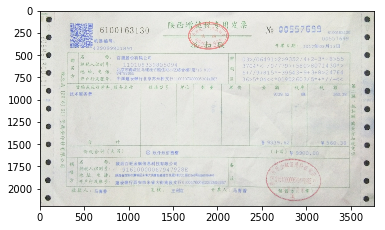

In [9]:
with tf.Graph().as_default():
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        orientation, common_queue_capacity=32, common_queue_min=1)

    image, label = data_provider.get(['image', 'label'])

    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            np_image, np_label = sess.run([image, label])
            print(np_label)
            plt.figure()
            plt.imshow(np_image)